# **A3 Entrenamiento de Red Neuronal Simple**

Nombre del alumno: Carlos Adrián Torres González

Matrícula: 2077613

Hora clase: LMV/N1


# **Objetivo.-**  

* Comprender los conceptos básicos de las redes neuronales artificiales y su uso en tareas de clasificación de imágenes.
* Aprender a utilizar Python y TensorFlow para entrenar una red neuronal artificial.
* Entrenar una red neuronal artificial en el conjunto de datos MNIST para clasificar dígitos escritos a mano.
* Evaluar el rendimiento del modelo entrenado.

# **Instrucciones.-**

Entrenar una red neuronal artificial en el conjunto de datos MNIST basándose en el ejemplo que se discutió en clase (1).

In [ ]:
#Importación de TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

#Imporación de librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [ ]:
#Imporación del conjunto de datos MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
class_names = ['cero','uno','dos','tres','cuatro','cinco','seis','siete','ocho','nueve']

# Exploración del set de datos

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# Pre-procesamiento

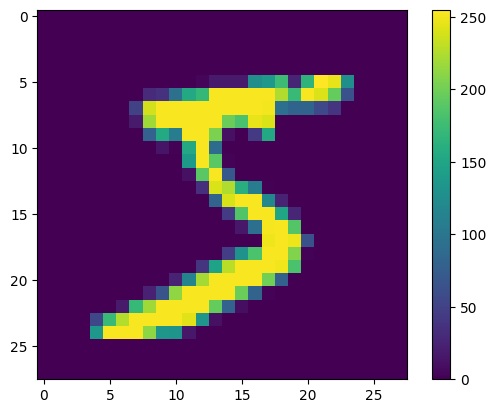

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

**Normalización**

In [ ]:
train_images = train_images / 255
test_images = test_images / 255

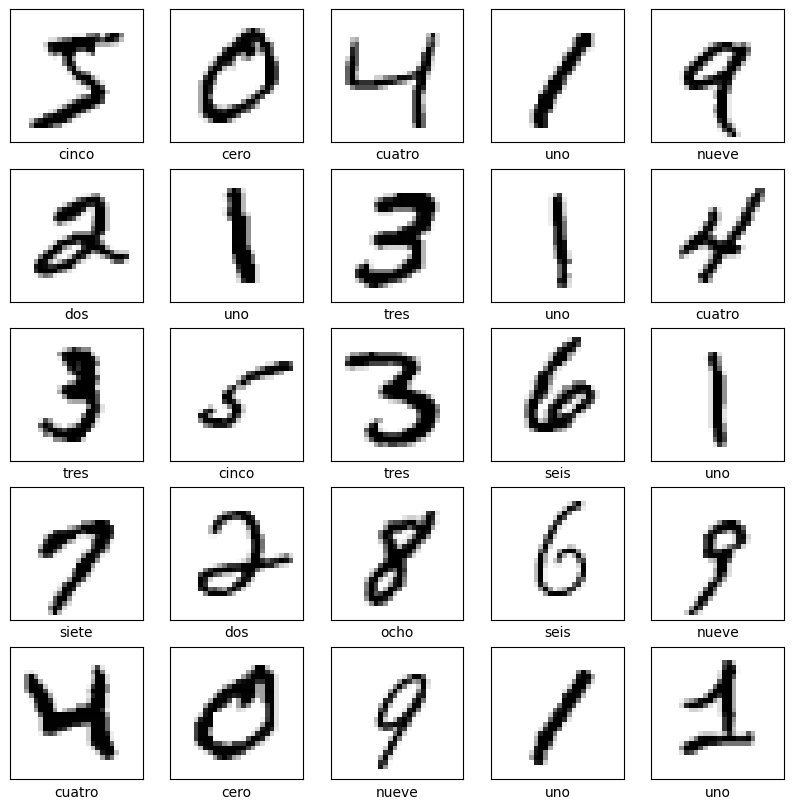

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

# Creación del modelo de Red Neronal Simple


**Configuración de capas**

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

**Compilación del modelo**

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 8ms/step - loss: 0.2600 - accuracy: 0.9253
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1143 - accuracy: 0.9664
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0776 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0586 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0455 - accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0355 - accuracy: 0.9896
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0282 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0223 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0187 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss

# Evaluación de exactitud

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.0852 - accuracy: 0.9777 - 768ms/epoch - 2ms/step


#Realización de predicciones

In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [ ]:
predictions[0]

array([6.3667049e-10, 3.2732788e-12, 1.9093114e-09, 3.3991321e-07,
       2.5659251e-12, 2.1728203e-10, 3.6259331e-16, 9.9999958e-01,
       1.2577814e-10, 3.9872710e-09], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
test_labels[0]

7

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

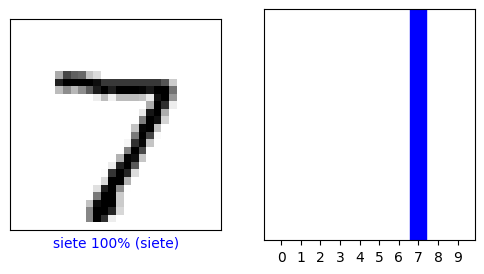

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

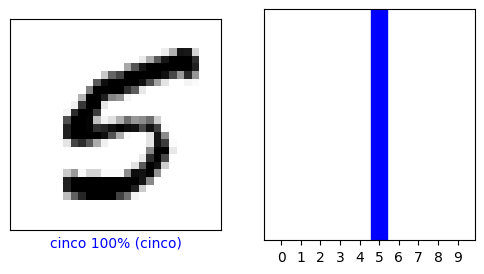

In [ ]:
i = 5432
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

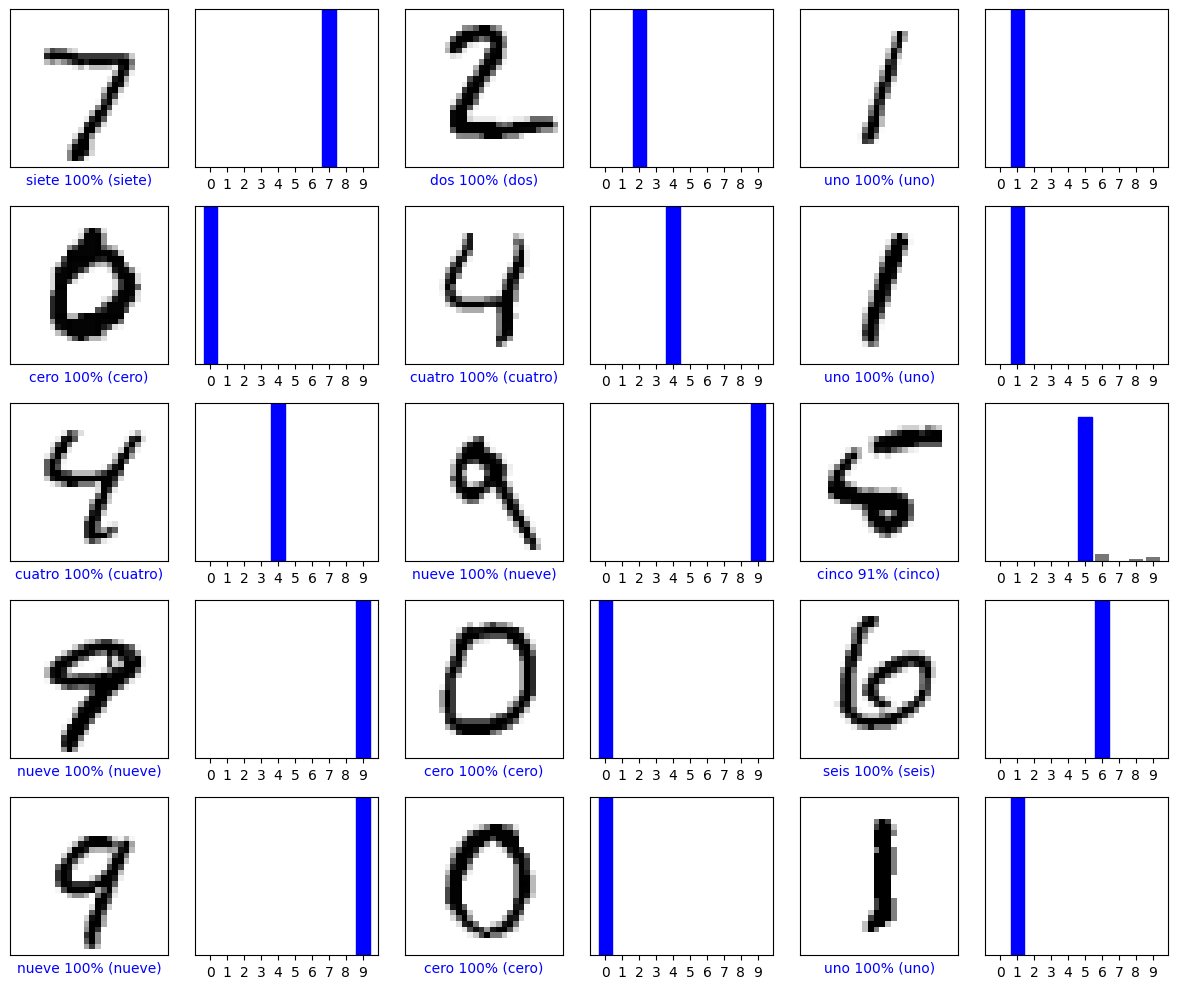

In [ ]:
num_rows = 5 
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
img = test_images[1]
print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 100ms/step
[[9.14388601e-14 1.46332710e-07 9.99999881e-01 4.72572537e-10
  1.06088020e-19 7.71834680e-11 1.27718626e-11 6.84649376e-22
  2.09840196e-12 1.17199900e-14]]


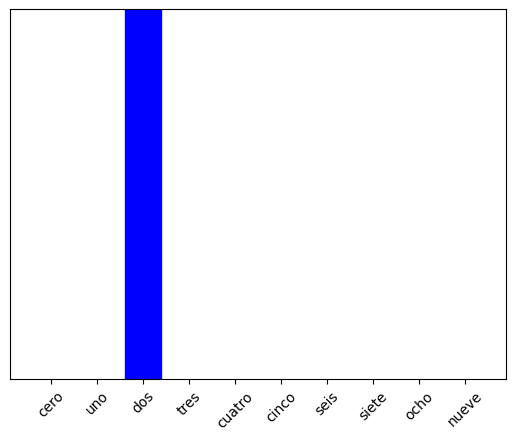

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

2

# Discusión del los resultados

**Set de entrenamiento**

El set de imágenes MNIST consta de un total de 70,000 imágenes de 28x28 pixeles, de las cuales 60,000 son para el entrenamiento del modelo. Del set total de imágenes se tienen 10 clases diferentes, cuyos nombres de clase van del cero al nueve. A cada una de ellas se les aplicó el proceso de normalización antes de realizar la creación del modelo de Red Neuronal Simple.

Tras la creación del modelo de entrenamiento con un total de tres capas (de aplanamiento, capa oculta con 128 neuronas y una función de activación tipo relu; y una capa de salida con 10 neuronas y una función de activación tipo softmax), los resultados fueron los siguientes:

* De las 10 épocas de entrenamiento, desde la primera, la exactitud estaba por arriba del 92% junto a una pérdida del 26%. Al finalizar con todas las épocas, el modelo alcanzó una exactitud del 99.52% junto a una pérdida del 1.52%.
* Posteriormente se realizo una evaluación de la exactitud del modelo, donde el resultado arrojado fue de un 97.77% con un 8.52% de pérdida. Esto quiere decir que el modelo no presenta sobreajuste (overfit) ni subajuste (underfit), en vista de que tales valores son similares a los de la viñeta anterior. 

**Set de prueba**

Con las 10,000 imágenes restantes del set total de MNIST se elaboraron las predicciones, así como las imágenes de entrenamiento, estas también pasaron por el proceso de normalización.
A través de la línea “predictions = model.predict(test_images)” se define la variable a utilizar para efectuar predicciones . Con el fin de realizar la prueba a una sola imagen, basta con escribir “predictions[ ]” y entre los corchetes el número de la imagen a predecir, al ejecutar lo anterior se obtienen las certidumbres a las que la imagen pertenezca a cierta clase, pudiendo redondearse los valores y obtener el número de clase correspondiente a la imagen, es decir, la predicción del modelo.

Para una mejor visualización de los resultados de prueba, es posible generar una matriz, donde se observan diferentes imágenes, así como los resultados de sus predicciones de manera escrita o en gráfica. Tomando en consideración las 15 imágenes utilizadas en la matriz anterior, se concluye que:

* El modelo presenta una gran exactitud, ya que de las 15 imágenes mostradas en la matriz, 14 de ellas tienen una certeza del 100% de corresponder a la clase verdadera; mientras que de la imagen restante, el modelo tiene una certeza del 91% de que esta pertenece a la clase verdadera, siendo las probabilidades de cada una de las clases sobrantes menores al 7%.




# **Referencias**

1. https://www.tensorflow.org/tutorials/images/cnn?hl=es-419
2. https://www.tensorflow.org/tutorials/keras/classification?hl=es-419
3. https://www.tensorflow.org/datasets/catalog/mnist?hl=es-419
